### Working with Dataset

In [1]:
# Importing the Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importing the Dataset
dataset = pd.read_csv('data_20160405.csv')
dataset = dataset.iloc[:,1:] #Starting from the first index as warding of the first column as it contain serial number in original data
dataset.head()

,accID,accType,accSize,accTargets,district,month,sales,qty,strategy1,strategy2,strategy3,salesVisit1,salesVisit2,salesVisit3,salesVisit4,salesVisit5,compBrand
0,XYZ-987002,Pharmacy,700,25,3,01-10-2013,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,XYZ-987005,Hospital,790,24,3,01-10-2013,0,0,0.0,0.0,0.0,0.0,450000.0,75000.0,75000.0,0.0,4
2,XYZ-987006,Hospital,320,14,3,01-10-2013,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,XYZ-987007,Pharmacy,1000,36,3,01-10-2013,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,XYZ-987008,Hospital,440,18,3,01-10-2013,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [3]:
# Finding the missing values
dataset.isnull().sum()

accID          0
accType        0
accSize        0
accTargets     0
district       0
month          0
sales          0
qty            0
strategy1      0
strategy2      0
strategy3      0
salesVisit1    0
salesVisit2    0
salesVisit3    0
salesVisit4    0
salesVisit5    0
compBrand      0
dtype: int64

Above output contains no missing value, hence no missing value treatment

### Statistical test to check the consistencies of different Marketing Strategies 

**Applying one way anove to check the consistency of the three strategy as a marketing expediture**

Here, H0: Null Hypothesis : mean(Strategy1) = mean(Strategy2) = mean(Startegy3) are equal

Ha: Alternative Hypothesis: There exist one group whose mean values are different

In [4]:
from scipy.stats import f_oneway
f_oneway(dataset['strategy1'],dataset['strategy2'],dataset['strategy3'])

F_onewayResult(statistic=299.9687822134629, pvalue=8.258747210840436e-127)

The F statistic and p-value turn out to be equal to 299.9687822134629 and 8.258747210840436e-127 respectively. Since the p-value is wayless than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the strategy among three different marketing expenditure. 

**Applying three way anove to check the consistency of the three marketing expenditure stratgy on sales**

Here, H0: Null Hypothesis : Stratgies are insignificant for sales

Ha: Alternative Hypothesis: Strategies are Significant

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing two-way ANOVA
model = ols('sales ~ C(strategy1) + C(strategy2) +  C(strategy3)',
            data=dataset).fit()
result = sm.stats.anova_lm(model, type=3)
  
# Print the result
print(result)

                  df        sum_sq       mean_sq         F         PR(>F)
C(strategy1)   218.0  4.310034e+16  1.977080e+14  7.845835  4.904044e-155
C(strategy2)   753.0  7.409832e+16  9.840414e+13  3.905066  6.184737e-132
C(strategy3)    28.0  9.432374e+14  3.368705e+13  1.336835   1.117595e-01
Residual      2084.0  5.251492e+16  2.519910e+13       NaN            NaN


The p-values for strategy 1, startegy 2 and startegy 3  to be less than 0.05 which implies that the means of both the factors possess a statistically significant effect on sales.

### Further analysis with the Linear Model to predict Sales based on Strategy 1, Strategy 2 and Startegy 3

#### Startegy 1

In [6]:
X = dataset[['strategy1']].values #Independent Variable Startegy1
y = dataset[['sales']].values #Dependent Variable Sales

In [7]:
# Splitting the model into training and test set with test size 33.33%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
#Applying linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
#Predictors
y_pred = regressor.predict(X_test)

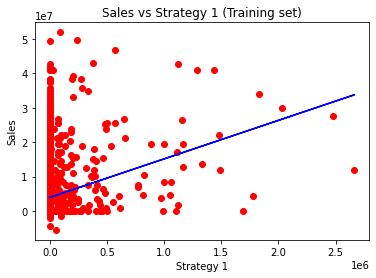

In [10]:
#Visualization on the Training set for Strategy1 and its effect with sales
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Strategy 1 (Training set)')
plt.xlabel('Strategy 1')
plt.ylabel('Sales')
plt.show()

#### Strategy 2 

In [11]:
X = dataset[['strategy2']].values  #Independent Variable Startegy2
y = dataset[['sales']].values  #Dependent Variable Sales

In [12]:
# Splitting the model into training and test set with test size 33.33%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [13]:
#Applying linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predictors
y_pred = regressor.predict(X_test)

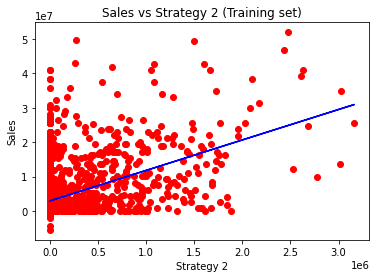

In [15]:
#Visualization on the Training set for Strategy2 and its effect with sales
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Strategy 2 (Training set)')
plt.xlabel('Strategy 2')
plt.ylabel('Sales')
plt.show()

#### Strategy 3

In [16]:
X = dataset[['strategy3']].values  #Independent Variable Startegy3
y = dataset[['sales']].values  #Dependent Variable Sales

In [17]:
# Splitting the model into training and test set with test size 33.33%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [18]:
#Applying linear model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [19]:
#Predictors
y_pred = regressor.predict(X_test)

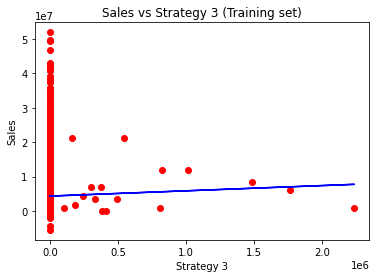

In [20]:
#Visualization on the Training set for Strategy3 and its effect with sales
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Sales vs Strategy 3 (Training set)')
plt.xlabel('Strategy 3')
plt.ylabel('Sales')
plt.show()

**Conclusion** : Sales moves the most in value with Strategy 1 and Strategy 2, whereas least with strategy 3  

### Checking the change in sales due to a new competitor drug entrance into the market since mid-2015.

In [21]:
# Dataset header to select specific variables
dataset.columns

Index(['accID', 'accType', 'accSize', 'accTargets', 'district', 'month',
       'sales', 'qty', 'strategy1', 'strategy2', 'strategy3', 'salesVisit1',
       'salesVisit2', 'salesVisit3', 'salesVisit4', 'salesVisit5',
       'compBrand'],
      dtype='object')

In [22]:
data = dataset[['month','accType','sales','compBrand','strategy1', 'strategy2', 'strategy3']] #Select the desired columns
data_4 = data.groupby('compBrand').get_group(4) # Grouping brands as per four competitors 
data_5 = data.groupby('compBrand').get_group(5) # Grouping brands as per five competitors 

In [23]:
# Checking the  unique account type
data['accType'].unique()

array(['Pharmacy', 'Hospital', 'Polyclinic', 'Private Clinic'],
      dtype=object)

In [24]:
#Average Sales per Competitive brand for four competition
data_avg_4 = data_4.groupby(['accType']).sum() # Finding the sum as per total sales based on account type viz: Hospital, Pharmacy, Polyclinic and Private Clinic
data_avg_4["Average sales per Competition"] = data_avg_4['sales']/data_avg_4['compBrand'] # Calculating the total sales average per competition
data_avg_4 = data_avg_4.reset_index() # Reset the index
data_avg_4

,accType,sales,compBrand,strategy1,strategy2,strategy3,Average sales per Competition
0,Hospital,4949684595,4560,41078472.0,200884961.0,10459369.0,1.085457e+06
1,Pharmacy,3553851383,1680,43828303.0,134883916.0,4853400.0,2.115388e+06
2,Polyclinic,190077426,2800,1837846.0,13630317.0,0.0,6.788479e+04
3,Private Clinic,268921211,880,264256.0,10312106.0,82439.0,3.055923e+05


In [25]:
#Average Sales per Competitive brand for five competition
data_avg_5 = data_5.groupby(['accType']).sum() # Finding the sum as per total sales based on account type viz: Hospital, Pharmacy, Polyclinic and Private Clinic
data_avg_5["Average sales per Competition"] = data_avg_5['sales']/data_avg_5['compBrand'] # Calculating the total sales average per competition
data_avg_5 = data_avg_5.reset_index() # Reset the index
data_avg_5

,accType,sales,compBrand,strategy1,strategy2,strategy3,Average sales per Competition
0,Hospital,1889906690,1140,4184388.0,59736738.0,4046342.0,1.657813e+06
1,Pharmacy,1581904543,420,7417608.0,47095630.0,910584.0,3.766439e+06
2,Polyclinic,153851906,700,501649.0,4187207.0,0.0,2.197884e+05
3,Private Clinic,63075021,220,54000.0,3642558.0,256615.0,2.867046e+05


In [26]:
data_sales_difference = data_avg_4[['accType']] #Creating new variable to find the change in sales
data_sales_difference[['Total sales difference']] = data_avg_5[['sales']] - data_avg_4[['sales']]  # New variable with total sales differnce 
data_sales_difference[['Average Sales per Competition difference']] = data_avg_5[['Average sales per Competition']] - data_avg_4[['Average sales per Competition']] # New variable with Average Sales per competition differnce
data_sales_difference

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,accType,Total sales difference,Average Sales per Competition difference
0,Hospital,-3059777905,5.723557e+05
1,Pharmacy,-1971946840,1.651052e+06
2,Polyclinic,-36225520,1.519036e+05
3,Private Clinic,-205846190,-1.888764e+04


Average Sales increment can only be seen in Hospital, Pharmacy, Polyclinic and for the Private Clinic there is a huge dip Average sales with the value approx **188887.64 SGD**  post the new competitor brand since 2015 mid 

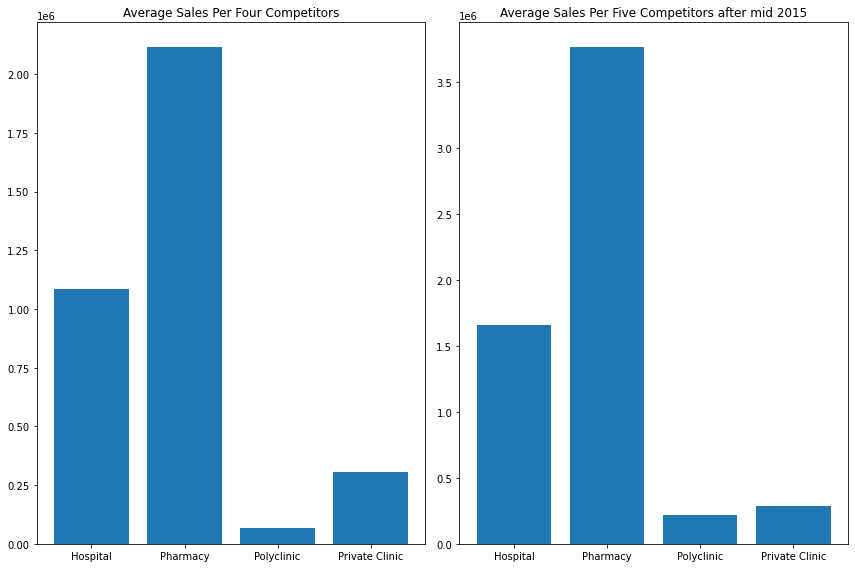

In [27]:
# Visualizing the result with Subplots for comparision in Average sales with new competitor
# empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (12,8))

axes[0].bar(data_avg_4['accType'],data_avg_4['Average sales per Competition'])
axes[0].set_title('Average Sales Per Four Competitors')

axes[1].bar(data_avg_5['accType'],data_avg_5['Average sales per Competition'])
axes[1].set_title('Average Sales Per Five Competitors after mid 2015')

plt.tight_layout()
plt.show()

### **Optional Challenge**: The business suspects that different accounts may respond differently to different marketing strategies. Further Analysis with different marketing strategies

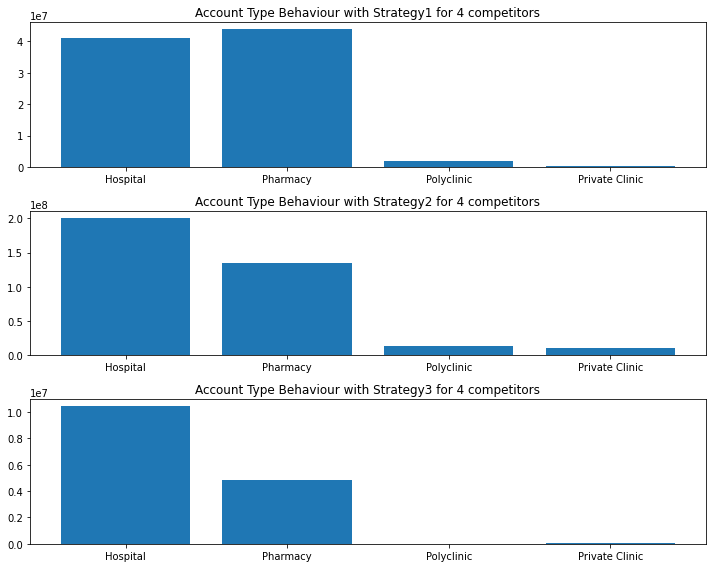

In [28]:
# Visualizing the marketing expendiure on different Account type based on three strategies for three competitors
# empty canvas of 3 by 1 subplots
fig, axes = plt.subplots(nrows=3,ncols=1,figsize = (10,8))

axes[0].bar(data_avg_4['accType'],data_avg_4['strategy1'])
axes[0].set_title('Account Type Behaviour with Strategy1 for 4 competitors')

axes[1].bar(data_avg_4['accType'],data_avg_4['strategy2'])
axes[1].set_title('Account Type Behaviour with Strategy2 for 4 competitors')

axes[2].bar(data_avg_4['accType'],data_avg_4['strategy3'])
axes[2].set_title('Account Type Behaviour with Strategy3 for 4 competitors')


plt.tight_layout()
plt.show()

For the above bar plot based on 4 competitors
1.   Hospital has the maximum spent on expediture based on startegy 2
2.   Pharmacy has the maximum spent on expediture based on startegy 2
1.   Polyclinic has the maximum spent on expediture based on startegy 2 and least for strategy 3
2.   Private Clinic has the maximum spent on expediture based on startegy 2




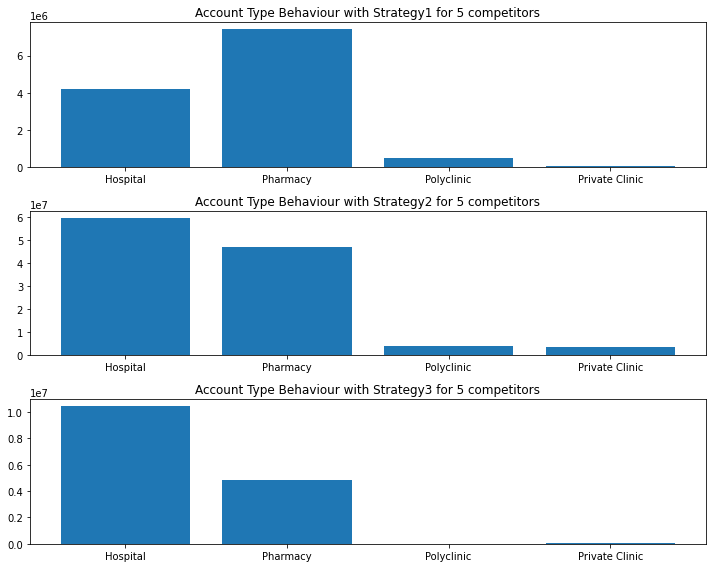

In [29]:
# Visualizing the marketing expendiure on different Account type based on three strategies for five competitors.
# empty canvas of 3 by 1 subplots
fig, axes = plt.subplots(nrows=3,ncols=1,figsize = (10,8))

axes[0].bar(data_avg_5['accType'],data_avg_5['strategy1'])
axes[0].set_title('Account Type Behaviour with Strategy1 for 5 competitors')

axes[1].bar(data_avg_5['accType'],data_avg_5['strategy2'])
axes[1].set_title('Account Type Behaviour with Strategy2 for 5 competitors')

axes[2].bar(data_avg_4['accType'],data_avg_4['strategy3'])
axes[2].set_title('Account Type Behaviour with Strategy3 for 5 competitors')

plt.tight_layout()
plt.show()

For the above bar plot based on 5 competitors w.e.f. mid 2015.
1.   Hospital has the maximum spent on expediture based on startegy 2
2.   Pharmacy has the maximum spent on expediture based on startegy 2
1.   Polyclinic has the maximum spent on expediture based on startegy 2 and least for strategy 3
2.   Private Clinic has the maximum spent on expediture based on startegy 2




Hence, we can conclude no change in expediture spending after introducing new competitor since mid 2015

X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X THE END X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X=X